In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


import matplotlib.pyplot as plt
#pip install wordcloud and pillow using CMD line

In [2]:
df = pd.read_excel('Yelp_Update_Cleaned_5_20.xlsx')

In [3]:
#df.head()

In [4]:
#histogram to check where most restaurants currently reside in

Text(0.5,1,'Restaurants per Zip Code')

<Figure size 2250x1800 with 0 Axes>

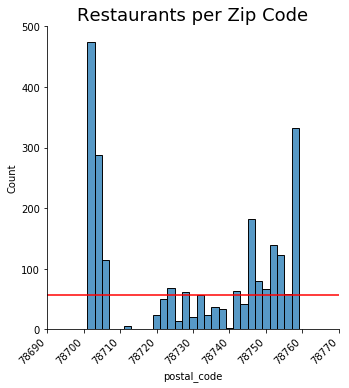

In [5]:
y=df['postal_code'].value_counts().mean()
#avereage # of restaurants in all zip codes = 55.1



plt.figure(figsize=(15,12),dpi=150)
chart = sns.displot(data=df, x="postal_code",kind="hist",binwidth=2)
#can see that majority of restaurants are located in the 78700-78710 range, and the 78740-78760 range 
#can imply that the 750 range might be where businesses are starting to become more populated 


chart.set_xticklabels(size=10, rotation=45, horizontalalignment='right')

chart.set_yticklabels(size=10)


plt.axhline(y=y, color='r', linestyle='-')

plt.title('Restaurants per Zip Code',fontsize=18)

In [6]:
#building a wordcloud for the categories column
#https://www.datacamp.com/community/tutorials/wordcloud-python --> tutorial for this WordCloud 

In [7]:
text = " ".join(review for review in df.categories)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 155036 words in the combination of all review.


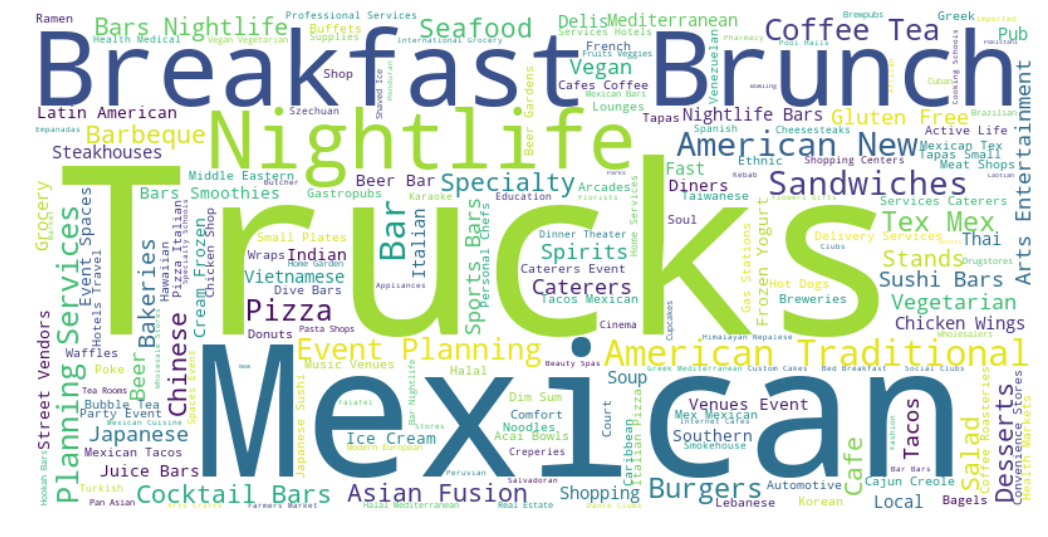

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors","Restaurant","Restaurants","Food"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800,height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[18,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#individual zip code analysis

In [10]:
df[df['name']=="Nervous Charlie's"]['postal_code']
#check what zip code Nervous Charlie's is located in 

554    78751
Name: postal_code, dtype: int64

In [11]:
len(df[df['postal_code']==78751])
#61 total restaurants in the 78751 zip code

62

In [12]:
singlezip = df[df['postal_code']==78751]
#single zip code analysis of 78751
#create a new df for the 78751 zip code 

In [13]:
singlezip.head(1)
#test

,Unnamed: 0,business_id,name,address,postal_code,stars,review_count,is_open,attributes,categories,hours,date
39,69,EwUahd4SYKdPH1p1Cpe5fg,Hyde Park Bar & Grill Central,4206 Duval St,78751,3.5,627,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessPar...","Bars, Burgers, Food, American (New), Breakfast...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","2010-01-23 02:28:09, 2010-01-24 03:35:02, 2010..."


In [14]:
singlezip.iloc[0]['categories'].split(',')
#test to see how the split would work

['Bars',
 ' Burgers',
 ' Food',
 ' American (New)',
 ' Breakfast & Brunch',
 ' American (Traditional)',
 ' Restaurants',
 ' Gluten-Free',
 ' Nightlife']

In [15]:
words = []
count=0

while count < len(df[df['postal_code']==78751]): 
    words.extend(singlezip.iloc[count]['categories'].split(','))
    count+=1
#parses through each row's categories + splits on the comma
#puts all words in the categories column into the "words" list

filler_words=[' Restaurants',' Food','Restaurants']
words = [i for i in words if i not in filler_words]   
words = [x.strip(' ') for x in words]

Counter(words).most_common(15)


#import counter to see the most "popular" categories as decided by Yelp within the 78751 zip code 
#ignoring the top3; breakfast, mexican, food trucks, bars, sandwiches --> are all good bets 
#we can see how this is reflective of the general area of Austin, as shown by the WordCloud above 

#general conclusion: Nervous Charlie's, category wise, is in a good location due to its "breakfast/brunch" notation 

[('Breakfast & Brunch', 12),
 ('Sandwiches', 11),
 ('Mexican', 10),
 ('American (Traditional)', 9),
 ('Food Trucks', 9),
 ('Bars', 8),
 ('Burgers', 8),
 ('Nightlife', 8),
 ('Vegan', 7),
 ('Pizza', 6),
 ('Coffee & Tea', 6),
 ('Seafood', 5),
 ('Japanese', 5),
 ('Caterers', 5),
 ('Event Planning & Services', 5)]

In [16]:
#all areas analysis

#from Arjun's site: https://www.city-data.com/zipmaps/Austin-Texas.html

In [17]:
southzips = [78704, 78749, 78745, 78748, 78741,78744]
northzips = [78730,78731,78732,78734,78613,78727,78758,78753,78751,78757,78701,78703,78705,78756,78759,78750,78728,78712]
eastzips = [78702,78721,78723,78742,78722,78752,78719,78724]
westzips = [78746,78733,78735]
popzips = [78746,78722,78723,78613,78701,78705,78759]

total_zips = [southzips,northzips,eastzips,westzips,popzips]

'''
#zip codes not mentioned:[78701,78705,78759,78757, 78756,78703,78744,
78750,78719,78728,78738,78737,78754,78726,78729,78736,78724,78798,78747,78712,78617,78739
-roughly 928 rows that are excluded if the zip codes above are not included
-although a lot of zip codes are "beyond" the greater Austin area, I included them for the sake of the different areas
-can easily change what we want to include in our analysis by adding/removing zip codes from above
-at the very least, consider the most "popular" zip codes that are left out, including: 

78701    274
78705    114
78759     95
78757     94
78756     59
78703     55
78744     41
78750     37
78719     25
78728     21

added: 
south: 44
north: 1,3,5,57,59,56,50,28,12
east: 19,24
west:
popular: 1,5,59

'''

'\n#zip codes not mentioned:[78701,78705,78759,78757, 78756,78703,78744,\n78750,78719,78728,78738,78737,78754,78726,78729,78736,78724,78798,78747,78712,78617,78739\n-roughly 928 rows that are excluded if the zip codes above are not included\n-although a lot of zip codes are "beyond" the greater Austin area, I included them for the sake of the different areas\n-can easily change what we want to include in our analysis by adding/removing zip codes from above\n-at the very least, consider the most "popular" zip codes that are left out, including: \n\n78701    274\n78705    114\n78759     95\n78757     94\n78756     59\n78703     55\n78744     41\n78750     37\n78719     25\n78728     21\n\nadded: \nsouth: 44\nnorth: 1,3,5,57,59,56,50,28,12\neast: 19,24\nwest:\npopular: 1,5,59\n\n'

In [18]:
filler_words=[' Restaurants',' Food','Restaurants','Food']
names = ['South','North','East','West','Popular']
graph_df = pd.DataFrame(columns=['Area','Category','Value'])


for i in total_zips:

    temp_df = df[df['postal_code'].isin(i)]

    words = []
    inner_count=0

    while inner_count < len(temp_df): 
        words.extend(temp_df.iloc[inner_count]['categories'].split(','))
        inner_count+=1
        
    words = [i for i in words if i not in filler_words]  
    temp_list = Counter(words).most_common(7)
    print(f'The 15 most common categories in the {names[total_zips.index(i)]} zip codes of Austin are: {temp_list}\n')
    
   
    for item in temp_list:
        graph_df=graph_df.append({'Area':names[total_zips.index(i)],'Category':temp_list[temp_list.index(item)][0],
                        'Value':temp_list[temp_list.index(item)][1]},ignore_index=True)

'''        
#can narrow/expand the bar plot below by increasing/decreasing the value in the .most_common(x) place
#7 is an abritrary number

#NOTE: temp_list is a list of tuples, as shown in the output. For example, if you call temp_list[0], it will return
('Mexican',103), and temp_list[0][0] returns ' Mexican', temp_list[0][1] returns 103, respectively. 
This is in the beginning of the for loop, as the value of temp_list will change for each area change (South, North...)


#https://pythonexamples.org/pandas-dataframe-add-append-row/
'''

The 15 most common categories in the South zip codes of Austin are: [(' Mexican', 117), (' Nightlife', 100), (' Food Trucks', 98), (' Bars', 92), (' Breakfast & Brunch', 78), (' American (Traditional)', 63), (' Pizza', 46)]

The 15 most common categories in the North zip codes of Austin are: [(' Nightlife', 229), (' Bars', 222), (' Breakfast & Brunch', 147), (' Mexican', 145), (' American (New)', 145), (' Food Trucks', 138), (' American (Traditional)', 132)]

The 15 most common categories in the East zip codes of Austin are: [(' Nightlife', 86), (' Bars', 81), (' Mexican', 75), (' Food Trucks', 69), (' Breakfast & Brunch', 55), (' American (Traditional)', 44), (' Sandwiches', 42)]

The 15 most common categories in the West zip codes of Austin are: [(' American (New)', 15), (' Nightlife', 13), (' Sandwiches', 12), (' Breakfast & Brunch', 12), (' Mexican', 10), (' Pizza', 10), (' Bars', 10)]

The 15 most common categories in the Popular zip codes of Austin are: [(' Nightlife', 141), (' B

"        \n#can narrow/expand the bar plot below by increasing/decreasing the value in the .most_common(x) place\n#7 is an abritrary number\n\n#NOTE: temp_list is a list of tuples, as shown in the output. For example, if you call temp_list[0], it will return\n('Mexican',103), and temp_list[0][0] returns ' Mexican', temp_list[0][1] returns 103, respectively. \nThis is in the beginning of the for loop, as the value of temp_list will change for each area change (South, North...)\n\n\n#https://pythonexamples.org/pandas-dataframe-add-append-row/\n"

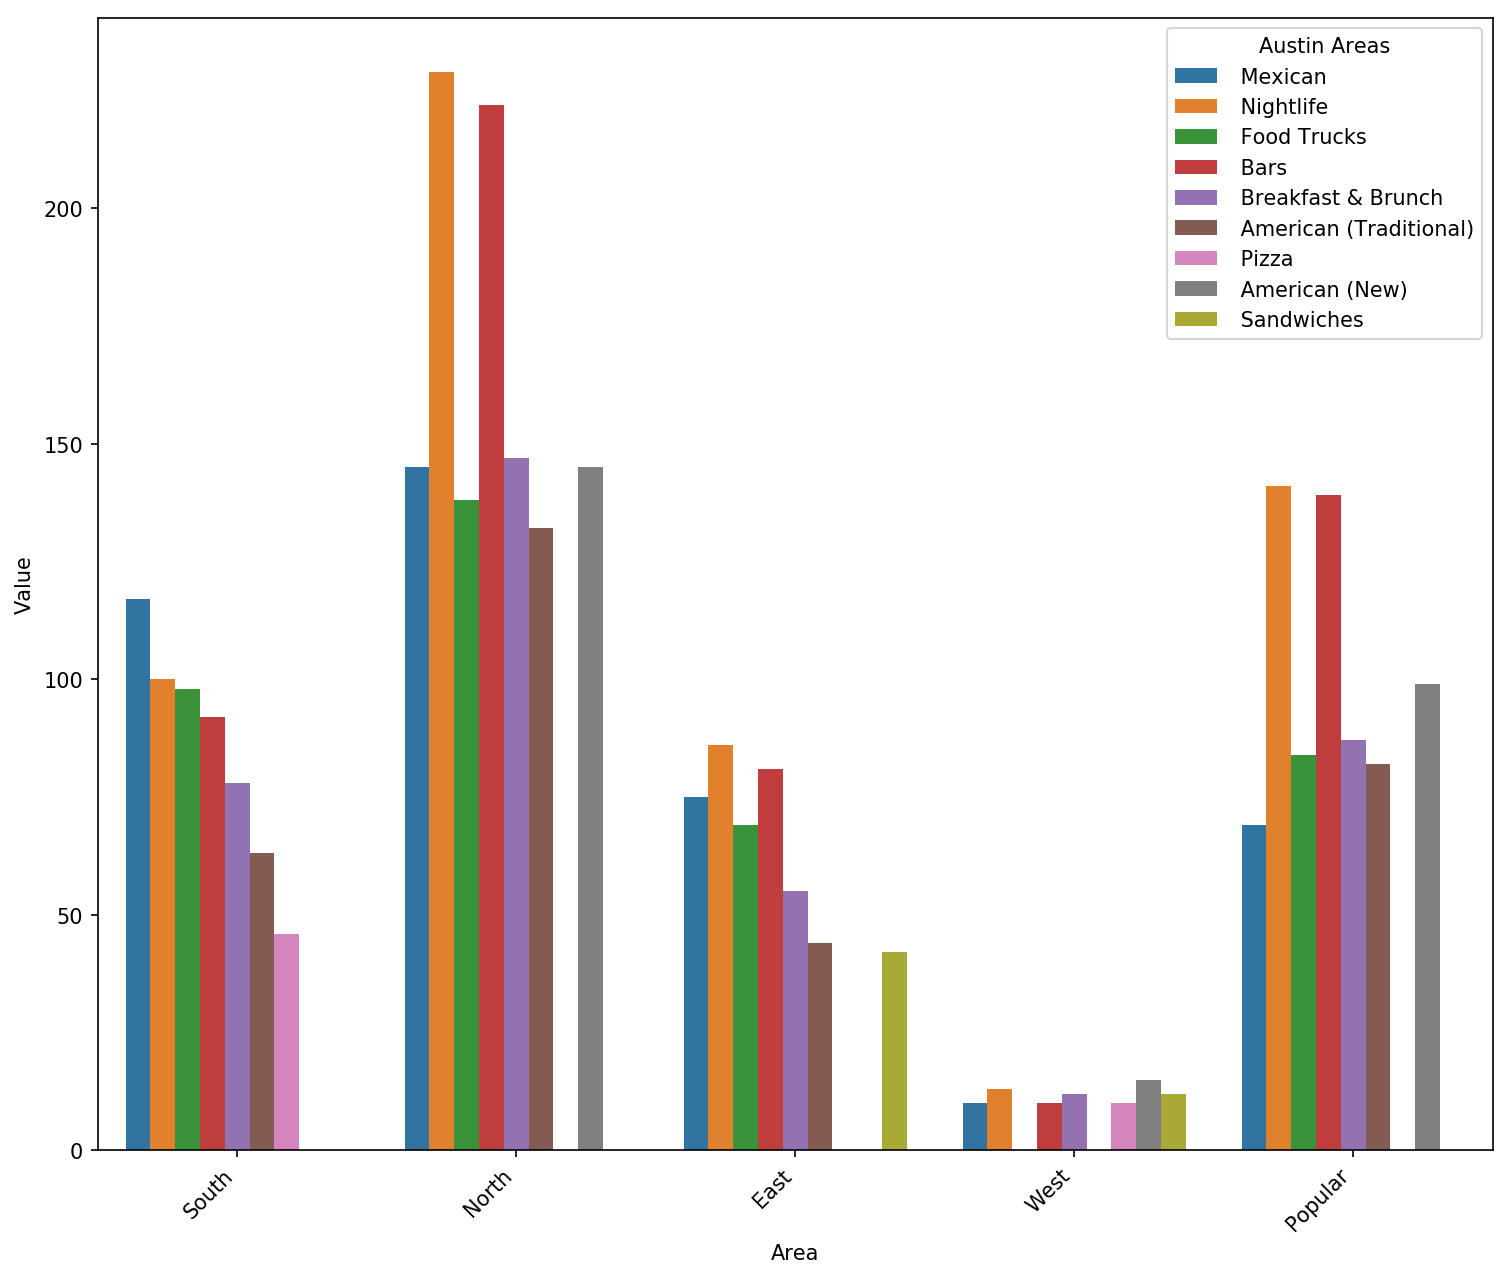

In [19]:
plt.figure(figsize=(12,10),dpi=150)
chart = sns.barplot(data=graph_df,x='Area',y='Value',hue='Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='upper right',title='Austin Areas')

In [20]:
#zip codes check

In [21]:
z1 = df['postal_code'].value_counts().index.tolist()

z1 = [int(i) for i in z1]
#https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/

len(z1)

41

In [22]:
z2 = southzips+northzips+eastzips+westzips
#https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python

len(z2)

35

In [23]:
z3 = [x for x in z1 if x not in z2]
z3
#ignore all zip codes in this list EXCEPT 78712

[78738, 78737, 78754, 78726, 78729, 78736, 78747, 78739]

In [24]:
df

,Unnamed: 0,business_id,name,address,postal_code,stars,review_count,is_open,attributes,categories,hours,date
0,1,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...","2017-03-21 16:45:08, 2017-03-22 00:46:01, 2017..."
1,5,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,78748,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...","2010-02-01 00:30:57, 2010-03-06 01:11:29, 2010..."
2,7,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,3.5,119,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Tex-Mex, Mexican, Tacos, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","2019-02-24 00:01:29, 2019-03-06 18:14:49, 2019..."
3,8,fBvQQUk1-V9IUA8PbuYFWg,Newk's Eatery,408 Congress Ave,78701,3.5,43,1,"{'HasTV': 'True', 'BusinessParking': ""{'garage...","Pizza, Restaurants, American (Traditional), Am...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-18:0',...","2018-03-17 23:44:58, 2018-03-20 16:46:51, 2018..."
4,9,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,4.0,149,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Restaurants, Indian","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...","2018-07-03 17:29:39, 2018-07-04 05:52:00, 2018..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,4778,Bqq7_qnQ8I1BVNcjr88Ksg,Lakeside Pizza & Grill,"2900 N Quinlan Park Rd, Ste 200",78732,3.5,143,1,"{'RestaurantsDelivery': 'True', 'Alcohol': ""u'...","Restaurants, Gluten-Free, Pizza, American (New)","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...","2010-03-18 17:49:25, 2010-04-10 20:34:33, 2010..."
2361,4779,fTgnVCCu6k_Ds25Nz73s5Q,Sushi Zushi,"1611 W 5th St, Ste 105",78703,3.0,456,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Sushi Bars, Japanese, Soup, Restaurants, Asian...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","2010-01-29 17:42:23, 2010-02-01 02:17:24, 2010..."
2362,4780,erLD01SfdUbGWurNoJTAzw,The Vegan Yacht,5212 Manchaca Rd,78745,4.5,205,1,"{'Alcohol': ""u'beer_and_wine'"", 'BusinessAccep...","American (Traditional), Gluten-Free, Vegan, Lo...","{'Wednesday': '12:0-15:0', 'Thursday': '12:0-2...","2010-07-10 02:29:46, 2010-07-18 03:44:47, 2010..."
2363,4782,io_UQS_WwonlCPCfKy3Hdw,Super Bowl,"719 W William Cannon Dr, Ste 103",78745,3.5,214,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Chinese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","2010-10-30 22:57:47, 2010-11-22 23:53:41, 2010..."


In [25]:
category_list = []

i=0
while i<len(df):
    for x in df.iloc[i].categories.split(', '):
        if x not in category_list:
            category_list.append(x)
        else: 
            pass

        i+=1
    
category_list

['Bars',
 'Nightlife',
 'Cocktail Bars',
 'Seafood',
 'Restaurants',
 'Sushi Bars',
 'Coffee Roasteries',
 'Cafes',
 'Food',
 'Coffee & Tea',
 'American (New)',
 'Gastropubs',
 'Wine Bars',
 'Event Planning & Services',
 'Caterers',
 'Italian',
 'Cheesesteaks',
 'Sandwiches',
 'American (Traditional)',
 'Desserts',
 'Burgers',
 'Mexican',
 'Breakfast & Brunch',
 'Gluten-Free',
 'Lounges',
 'Pizza',
 'Sports Bars',
 'Delis',
 'Bagels',
 'Ice Cream & Frozen Yogurt',
 'Bakeries',
 'Salad',
 'Vegetarian',
 'Fast Food',
 'Food Trucks',
 'Kebab',
 'Mediterranean',
 'Vegan',
 'Poke',
 'Hawaiian',
 'Chicken Wings',
 'Japanese',
 'Ramen',
 'Tex-Mex',
 'Beer Bar',
 'Tapas/Small Plates',
 'Tacos',
 'Food Delivery Services',
 'Food Stands',
 'Food Court',
 'Imported Food',
 'African',
 'Barbeque',
 'Soup',
 'Asian Fusion',
 'Pan Asian',
 'Vietnamese',
 'Thai',
 'Chinese',
 'Pakistani',
 'Hot Dogs',
 'Indian',
 'Party & Event Planning',
 'Buffets',
 'Arts & Entertainment',
 'Arcades',
 'Waffles',
 

In [26]:
'Sandwiches' in category_list

True

In [27]:
charlies_words=['Sandwiches', 'Bagels','Breakfast & Brunch']  #changed to Charlie's specific categories


In [28]:
'''
i=0
while i<len(df):
    if charlies_words[0] or  in df.iloc[i].categories.split(', '):
        i+=1
    elif charlies_words[1] in df.iloc[i].categories.split(', '):
        i+=1
    elif charlies_words[2] in df.iloc[i].categories.split(', '):
        i+=1
    else:
        df=df.drop(labels=i,axis=0)
        i+=1
'''

"\ni=0\nwhile i<len(df):\n    if charlies_words[0] or  in df.iloc[i].categories.split(', '):\n        i+=1\n    elif charlies_words[1] in df.iloc[i].categories.split(', '):\n        i+=1\n    elif charlies_words[2] in df.iloc[i].categories.split(', '):\n        i+=1\n    else:\n        df=df.drop(labels=i,axis=0)\n        i+=1\n"

In [29]:
df = pd.read_excel('Yelp_Update_Cleaned_5_20.xlsx')

In [30]:
zipsNC={}
i=0
while i<len(df):
    temp = df.iloc[i].categories
    if any(x in temp for x in charlies_words):
        zipc = df.iloc[i].postal_code
        
        if (zipc in zips):
            zips[zipc] += 1
        else:
            zips[zipc] = 1
        
        i+=1
    else: 
        i+=1
i=0
total = 0
while i<len(list(zips)):
    ind=list(zips)[i]
    total+=zips[ind]
    i+=1
print(f'the total # of restaurants with similar categories to NC is: {total}')
zipsNC    

NameError: name 'zips' is not defined

In [ ]:
zipdf = pd.DataFrame(data = zips,columns = ['Zip Code', 'Count'])

In [ ]:
zips.items()

In [ ]:
data = [[k,v] for k,v in zips.items()]
data

In [ ]:
zipdf = pd.DataFrame(data = data,columns = ['Zip Code', 'Count'])
zipdf

In [ ]:
zips={}
i=0
while i<len(df):
    
    zipc = df.iloc[i].postal_code

    if (zipc in zips):
        zips[zipc] += 1
    else:
        zips[zipc] = 1

    i+=1

a=0
total = 0
while a<len(list(zips)):
    ind=list(zips)[a]
    total+=zips[ind]
    a+=1
print(f'The total number of restaurants in all zip codes are: {total}')

zips  

In [ ]:
ind = list(zips)[0]

In [ ]:
len(df)

In [ ]:
zips[ind]

In [ ]:
i=0
total = 0
while i<len(list(zips)):
    ind=list(zips)[i]
    total+=zips[ind]
    i+=1
total

In [ ]:
df

In [ ]:
df.iloc[0].categories

In [ ]:
'Sandwiches' in df.iloc[0].categories.split(', ')

In [ ]:
i=0
temp= df.iloc[39].categories.split(', ')

if (charlies_words[0] in temp) or (charlies_words[1] in temp) or (charlies_words[2] in temp):
    i+=1
    print('yes')
else: 
    print('no')
i

In [ ]:
temp

In [ ]:
charlies_words[2] in temp

In [ ]:
i=39
if any(x in temp for x in charlies_words):
    print('yay')
else:
    print('nay')

In [ ]:
df.iloc[39]

In [ ]:
i=39
temp

In [ ]:
a_string = "A string is more than its parts!"
matches = ["more", "wholesome", "milk"]

if any(x in a_string for x in matches):
    print('yes')

In [ ]:
temp = df.iloc[0].categories
matches = ['pop','soap']
if any(x in temp for x in matches):
    print('yes')
else: 
    print('no')

In [ ]:
temp

In [ ]:
matches